In [1]:
## Code for simulating the Buoyancy oscillation of an object in a stratfied fluid

In [ ]:
import warnings
warnings.simplefilter(action="ignore")
import matplotlib.pyplot as plt
import numpy as np

In [3]:
## Function to find parcel's position, velocity

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def buoyancy_oscillation(rho_0,rho_z,rho_obj,z0,time,fri_coef,bot_depth):
    
    ##  inputs
    #rho_0=1025 #kg/m3 density at 0m depth
    #rho_z=1026  # bottom density
    #time # #model total run time  # in minutes
    #z0=-80 # parcel dropping depth
    #rho_obj=1025.6 # density of parcel
    #fri_coef=0.1 # friction coeﬃcient and has a unit of s−1
    #bot_depth=-1000
    ################################
    
    lev=30 # number  of vertical levels
    delta_t=1 # time step for computation # in seconds
    time_=time*60 # converted to seconds 
    depth=np.linspace(0,bot_depth,lev) # 
    g=9.8 # acce.gravity
    rho_=np.linspace(rho_0,rho_z,lev) #assuming density increase linearly
    ######################################
    # initial condition ########
    w0=0 # initial velocity
    z_=z0;w_=w0
    ######
   ####################################
    pos_=[];vel_=[];rho_amb2=[]

    for k in range(time_):
        ind_ = np.abs(np.array(depth) - z_).argmin()
        rho_amb=rho_[ind_];rho_amb2.append(rho_amb)
        g_=g*(rho_obj-rho_amb)/rho_obj
        wn=w_-(delta_t*g_)-(fri_coef*delta_t*w_);zn=z_+(delta_t*wn)
        
        
        # Boundary condition#################
        if (zn>=0) :
            wn=0;w_=0;zn=0;z_=0
            
        if (zn<=bot_depth) :
            wn=0;w_=0;zn=bot_depth;z_=bot_depth    
        z_=zn # update z
        w_=wn # update w
        pos_.append(zn);vel_.append(wn)
        #####################

    # find the eqb depth ####
    ind_eqb = np.abs(np.array(rho_) - rho_obj).argmin()
    depth_eqb=depth[ind_eqb]
    return(pos_,vel_,depth_eqb)

In [ ]:
# Inputs 

In [36]:
rho_0=1022
rho_z=1030
rho_obj=1025
z0=-750
time=60
bot_depth=-1000
fri_coef=0.001 #0.001 # 0 etc

 ##  inputs
    #rho_0=1025 #kg/m3 density at 0m depth
    #rho_z=1026  # bottom density
    #time # #model total run time  # in minutes
    #z0=-80 # parcel dropping depth
    #rho_obj=1025.6 # density of parcel
    #fri_coef=0.1 # friction coeﬃcient and has a unit of s−1
    #bot_depth=-1000
    ################################
    

pos_,vel_,depth_eqb= buoyancy_oscillation(rho_0,rho_z,rho_obj,z0,time,fri_coef,bot_depth)

In [ ]:
# Lets  plot the outputs

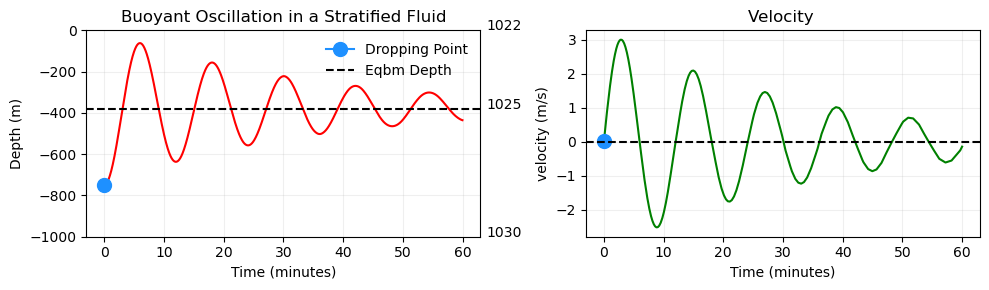

In [37]:
time_=time*60

xx=np.arange(time_)/60

fig, axs = plt.subplots(1, 2, figsize=(10, 3))#, gridspec_kw={'height_ratios': [2, 1]})
ax1, ax2 = axs  # Two subplots, ax1 on top, ax2 on bottom
ax1.plot(xx, pos_,color='r')
ax1.plot(pos_[0], marker='o',label='Dropping Point',color='dodgerblue',ms=10)
ax1.grid(alpha=0.2)

#ax1.axhline(y=-80, linestyle='--', color='k', label='y = -80')
ax1.axhline(y=depth_eqb, linestyle='--', color='k', label='Eqbm Depth')
ax1.set(xlabel='Time (minutes)', ylabel='Depth (m)', title='Buoyant Oscillation in a Stratiﬁed Fluid')

#ax1.text(2, -150, 'Parcel Density  \n' + str(rho_obj) + ' kg/m3')
ax1.text(time+4, 0,str(rho_0) )
ax1.text(time+4, bot_depth,str(rho_z) )
ax1.text(time+4, depth_eqb,str(rho_obj) )

ax1.set_ylim(bot_depth,0)
ax1.legend(frameon=False)

# Plot on the second subplot (you can customize this subplot as needed)
ax2.plot(xx, vel_, color='g')
ax2.plot(vel_[0], marker='o',label='Dropping Point',color='dodgerblue',ms=10)

ax2.set(xlabel='Time (minutes)', ylabel='velocity (m/s)', title='Velocity ')
ax2.axhline(y=0, linestyle='--', color='k')

ax2.grid(alpha=0.2)
# Adjust layout for better spacing
plt.tight_layout()

In [38]:
## Fourier transoform function
from numpy.fft import fft,fftfreq,ifft

def fft_(data,fx): # input data and samplinf frequency >> 1 second here
    signal=data
    n=len(signal) # tot number of data points 
    x=np.linspace(0,fx,n) # making n timesteps 
    freqs=fftfreq(n) # making all +ve -ve freq >> -0.5 to 0.5
    mask = freqs> 0 # only +ve freq
    fft_vals=fft(signal)
    fft_theo=2.0*np.abs(fft_vals/n) # theoratical ampli value
    ps=2.0*np.abs(fft_vals/n)**2 # power spectra
    
    times=1/freqs
    times[freqs==0]=n
    return(times[mask],ps[mask],ps[mask]/np.var(signal)) 

In [39]:
tt,ps,norm_ps=fft_(pos_,fx=1)

In [ ]:
## FFT of Oscillation

Text(0.5, 0, 'Period (minutes)')

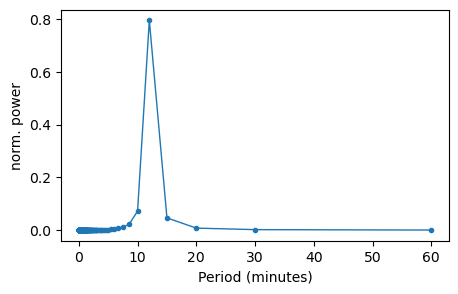

In [40]:
# time converted to minutes
plt.figure(figsize=(5,3))
plt.plot(tt/60,norm_ps,'-o',lw=1,ms=3)
plt.ylabel('norm. power')
plt.xlabel('Period (minutes)')


In [41]:
# Brunt vaisala frequency
g=9.8
N2=-g*(rho_z-rho_0)/(bot_depth-0)/((rho_z+rho_0)/2)
N2

7.641325536062379e-05

In [42]:
# peak oscilation from FFT 
tt[np.argmax(norm_ps)]/60 #in minutes

12.0

In [43]:
# Period of buoyancy oscillation dervied from N2 value

2*3.14/np.sqrt(N2)/60 #minutes # period of oscillation from BV F

11.97358061120654